# Project : Alternus Vera Iteration 3

#**Team: The Mean Squares**
* Jeyasri Subramanian [SJSU ID: 014510132]
* Subarna Chowdhury Soma [SJSU ID: 014549587]
* Pranav Lodha [SJSU ID: 009468121]
* Wasae Qureshi [SJSU ID: 014569880]

### Team Contributions:

|Features  |  Member |
|-----|-----|
| Bias |  Wasae Qureshi |
| Credibility & Reliability |  Pranav Lodha |
| News Converage |  Subarna Chowdhury Soma  |
| Micro Pattern |  Jeyasri Subramanian  |

# 10 Factors

* Feature 1 : Sentiment Analysis [Done]
*Feature 2 : LDA Topic Modelling [Done]
*Feature 3 : Sensationalism
*Feature 4 : Political Affiliation [Done]
*Feature 5 : Clickbait [Done]
*Feature 6 : Spam
*Feature 7 : Author Credibility
*Feature 8 : Source Reputation
*Feature 9 : Content Length [Done]
*Feature 10 : Word Frequency [Done]

# Imports

In [0]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import argparse
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import nltk as nl
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import ParameterGrid
import statistics
import random
import string
import warnings
from gensim.models import word2vec
from string import punctuation
from matplotlib import pyplot
from pandas import Series, datetime
from pandas.plotting import scatter_matrix, autocorrelation_plot
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
import nltk
import re
import io
import requests
import time
import gensim
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
import nltk.sentiment


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from scipy import sparse
# Code source: https://degravek.github.io/project-pages/project1/2017/04/28/New-Notebook/
# Dataset from Chakraborty et al. (https://github.com/bhargaviparanjape/clickbait/tree/master/dataset)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

change location here

In [0]:
location = "/content/drive/Shared drives/CMPE 257: Machine Learning/AlterusVera-Datasets/liar_dataset/"
location1= "/content/drive/Shared drives/CMPE 257: Machine Learning/AlterusVera-Datasets/"

# Loading Dataset

## Kaggle- Fake News

In [0]:
def get_parsed_data(url, sep='\t', header=None ):
  return pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')), sep=sep, header=header )

# Download and parse the dataset... Let us first work with 100 articles
KAGGLE_DATASET = 'https://github.com/synle/machine-learning-sample-dataset/raw/master/liar_dataset/kaggle'
fake_news_data = get_parsed_data('%s/kaggle-fake.csv'% KAGGLE_DATASET, ',' , 'infer' )

In [0]:
fake_news_data.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


## Liar Liar Dataset

In [0]:
colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 
            'speakerjobtitle', 'stateinfo','partyaffiliation', 
            'barelytruecounts', 'falsecounts','halftruecounts',
            'mostlytrueocounts','pantsonfirecounts','context']
headlinecolname = 'headline_text'
labelcolname = 'encoded_label'
processedheadlinecolname = 'processed_headline_text'

In [0]:
#method to load data
colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']
def load_train_data():
    #load data
    train_filename = location +'train.tsv'
    train_news = pd.read_csv(train_filename, sep='\t', names = colnames,error_bad_lines=False)
    return train_news

def load_test_data():
    test_filename = location+'test.tsv'
    test_news = pd.read_csv(test_filename, sep='\t', names = colnames,error_bad_lines=False)
    return test_news

def load_valid_data():
    test_filename = location+'valid.tsv'
    test_news = pd.read_csv(test_filename, sep='\t', names = colnames,error_bad_lines=False)
    return test_news

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(fake_news_data, y, test_size=0.2)

# Preprocessing

## Kaggle Fake News

In [0]:
fake_news_data = fake_news_data.dropna()

In [0]:
import re

def cleaning(raw_news):
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [0]:
import time

t1 = time.time()
fake_news_data['clean_title'] = fake_news_data["title"].apply(cleaning) 
t2 = time.time()
print("\nTime to clean, tokenize and stem title in fake_news_data: \n", len(fake_news_data), "news:", (t2-t1)/60, "min")

t1 = time.time()
fake_news_data['clean_thread_title'] = fake_news_data["thread_title"].apply(cleaning) 
t2 = time.time()
print("\nTime to clean, tokenize and stem thread_title in fake_news_data: \n", len(fake_news_data), "news:", (t2-t1)/60, "min")

# Testing
# t1 = time.time()
# fake_news_data['clean_text'] = fake_news_data["text"].apply(cleaning) 
# t2 = time.time()
# print("\nTime to clean, tokenize and stem text in fake_news_data: \n", len(fake_news_data), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem title in fake_news_data: 
 4702 news: 0.03791423638661703 min

Time to clean, tokenize and stem thread_title in fake_news_data: 
 4702 news: 0.03735010226567586 min


In [0]:
model = gensim.models.KeyedVectors.load_word2vec_format(location1+'GoogleNews-vectors-negative300.bin.gz', binary=True)
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


#### Spell Checker

In [0]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [0]:
def spell_checker(text):
    all_words = re.findall(r'\w+', text.lower()) # split sentence to words
    spell_checked_text  = []
    for i in range(len(all_words)):
        spell_checked_text.append(correction(all_words[i]))
    return ' '.join(spell_checked_text)

In [0]:
print("Before: \n", fake_news_data['clean_title'][0] )
t1 = time.time()
fake_news_data['clean_title'] = fake_news_data['clean_title'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the clean_title in fake_news_data: \n", len(fake_news_data), "news:", (t2-t1)/60, "min")

print("\nAfter: \n",fake_news_data['clean_title'][0] )
fake_news_data.head(2)

print("Before: \n", fake_news_data['clean_thread_title'][0] )
t1 = time.time()
fake_news_data['clean_thread_title'] = fake_news_data['clean_thread_title'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the clean_thread_title in fake_news_data: \n", len(fake_news_data), "news:", (t2-t1)/60, "min")

print("\nAfter: \n",fake_news_data['clean_thread_title'][0] )
fake_news_data.head(2)

Before: 
 muslim bust stole million gov benefit

Time to spell check the clean_title in fake_news_data: 
 4702 news: 2.8997551679611204 min

After: 
 muslim bust stole million gov benefit
Before: 
 muslim bust stole million gov benefit

Time to spell check the clean_thread_title in fake_news_data: 
 4702 news: 2.8979573090871176 min

After: 
 muslim bust stole million gov benefit


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,clean_title,clean_thread_title
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,muslim bust stole million gov benefit,muslim bust stole million gov benefit
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney general lotta lynch plead fifth,attorney general lotta lynch plead fifth


In [0]:
fake_news_data['type'].value_counts()

bs            4064
bias           271
conspiracy     163
hate            99
junksci         97
state            6
fake             2
Name: type, dtype: int64

## Liar Liar Dataset

#### Label Encoding

In [0]:
#label encoding
true_labels = ['original','true','mostly-true','half-true']
false_labels = ['barely-true','false','pants-fire']

def encode_news_type(input_label):
    if input_label in true_labels:
        return 1
    else:
        return 0

#### Remove Punctuations

In [0]:
#method to remove punctuations from textual data
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

#### Remove Stopwords

In [0]:
from nltk.stem.snowball import SnowballStemmer
sw = stopwords.words('english')
stemmer = SnowballStemmer("english")

#Remove stop words
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

#Lemmetize and pos tagging
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

#Stemming
def stemming(text):    
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

#### Distillation on Test and Training Data

In [0]:
def text_preprocess(df):
  ## headline_text
    #encode labels
    df['encoded_label'] = df.apply(lambda row: encode_news_type(row['label']), axis=1)
    #convert to lower case
    df['processed_headline_text'] = df['headline_text'].str.lower()
    #remove stop words
    df['processed_headline_text'] = df['processed_headline_text'].apply(remove_stopwords)
    #spell check
    df['processed_headline_text'] = df['processed_headline_text'].apply(spell_checker)
    #Lemmetize
    df['processed_headline_text'] = df['processed_headline_text'].apply(lemmatize_stemming)
    #stemming
    df['processed_headline_text'] = df['processed_headline_text'].apply(stemming)
    #remove punctuation
    df['processed_headline_text'] = df['processed_headline_text'].apply(remove_punctuation)
    #remove less than 3 letter words
    df['processed_headline_text']  = df.processed_headline_text.apply(lambda i: ' '.join(filter(lambda j: len(j) > 3, i.split())))
    return df[['headline_text','processed_headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo', 'partyaffiliation', 'context', 'encoded_label']]

In [0]:
#load test and train data
train_news = load_train_data()
test_news = load_test_data()
valid_news = load_valid_data()

In [0]:
#pre-processing train dataset
df_train = text_preprocess(train_news)
df_train.head(5)

,headline_text,processed_headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,context,encoded_label
0,Says the Annies List political group supports ...,nanni list polit group support third trimest a...,abortion,dwayne-bohac,State representative,Texas,republican,a mailer,0
1,When did the decline of coal start? It started...,declin coal start start natur took start begin...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,a floor speech.,1
2,"Hillary Clinton agrees with John McCain ""by vo...",hillari clinton agre john mccain vote give geo...,foreign-policy,barack-obama,President,Illinois,democrat,Denver,1
3,Health care reform legislation is likely to ma...,health care reform legisl like mandat free cha...,health-care,blog-posting,NaN,NaN,none,a news release,0
4,The economic turnaround started at the end of ...,econom turnaround start term,"economy,jobs",charlie-crist,NaN,Florida,democrat,an interview on CNN,1


In [0]:
#pre-processing test dataset
df_test = text_preprocess(test_news)
df_test.head(5)

,headline_text,processed_headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,context,encoded_label
0,Building a wall on the U.S.-Mexico border will...,build wall mexico border take liter year,immigration,rick-perry,Governor,Texas,republican,Radio interview,1
1,Wisconsin is on pace to double the number of l...,wisconsin pace doubl number layoff year,jobs,katrina-shankland,State representative,Wisconsin,democrat,a news conference,0
2,Says John McCain has done nothing to help the ...,john mccain done noth help,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,comments on ABC's This Week.,0
3,Suzanne Bonamici supports a plan that will cut...,suzann bonamici support plan choic medicar adv...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,a radio show,1
4,When asked by a reporter whether hes at the ce...,report whether center crimin scheme violat cam...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,a web video,0


In [0]:
#pre-processing valid dataset
df_valid = text_preprocess(valid_news)
df_valid.head(5)

,headline_text,processed_headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,context,encoded_label
0,We have less Americans working now than in the...,less american work,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,an interview with ABC17 News,0
1,"When Obama was sworn into office, he DID NOT u...",obama sworn offic holi bibl instead kura their...,"obama-birth-certificate,religion",chain-email,NaN,NaN,none,NaN,0
2,Says Having organizations parading as being so...,organ parad social welfar organ involv polit c...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,a U.S. Ways and Means hearing,0
3,Says nearly half of Oregons children are poor.,near half oregon children poor,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,an opinion article,1
4,On attacks by Republicans that various program...,attack republican various program econom stimu...,"economy,stimulus",barack-obama,President,Illinois,democrat,interview with CBS News,1


In [0]:
train_news['index'] = train_news.index

train_news.head()

test_news['index'] = test_news.index

test_news.head()

valid_news['index'] = valid_news.index

valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,encoded_label,processed_headline_text,index
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,0,less american work,0
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0,obama sworn offic holi bibl instead kura their...,1
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0,organ parad social welfar organ involv polit c...,2
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,1,near half oregon children poor,3
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,1,attack republican various program econom stimu...,4


In [0]:

train_news.to_csv(location+"train_cleantext.csv", sep=',')
test_news.to_csv(location+"test_cleantext.csv", sep=',')
valid_news.to_csv(location+"valid_cleantext.csv", sep=',')

# Visualizations

## Kaggle Fake News

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

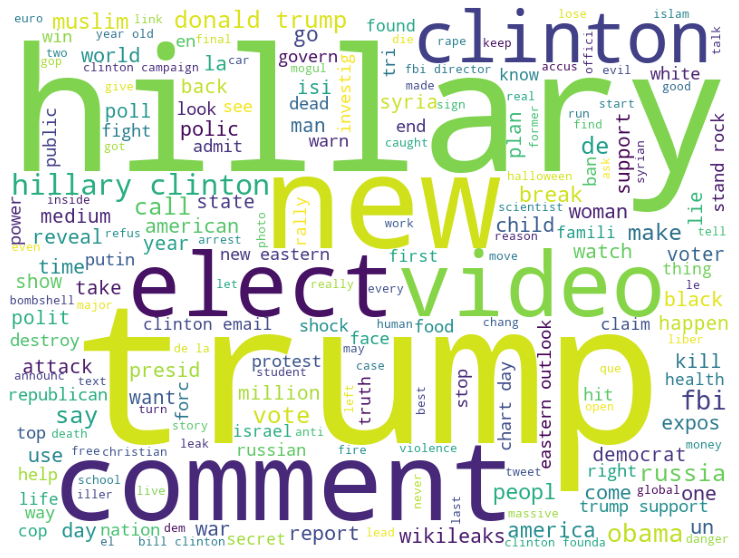

In [0]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(fake_news_data['clean_title']))

## Liar Liar Dataset

In [0]:
#text length matrix
def word_length_visualisation(df):
    text_len = []

    for i in range(len(df.headline_text)):
        text_len.append(len(str(df.headline_text[i])))
    plt.figure(figsize=(10,6))
    pd.DataFrame(text_len).hist(bins = 100)

Train Data Word Length Visualization


<Figure size 720x432 with 0 Axes>

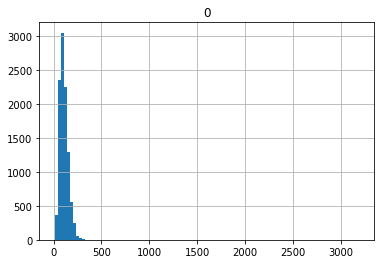

In [0]:
print('Train Data Word Length Visualization')
word_length_visualisation(df_train)

Test Data Word Length Visualization


<Figure size 720x432 with 0 Axes>

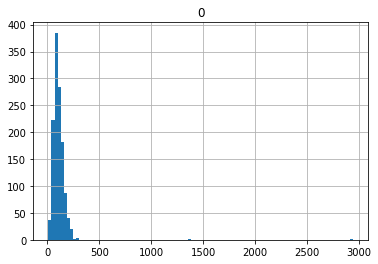

In [0]:
print('Test Data Word Length Visualization')
word_length_visualisation(df_test)

In [0]:
def fake_news_distribution(df):
    #Training data set with text, domain ranking and type.
    X = df[['processed_headline_text', 'encoded_label']]

    plt.title('Category Vs Count')
    X.groupby(['encoded_label']).size().plot(kind='barh', color='blue')
    plt.xlabel('count')
    plt.show()

Train Data Fake News Encoded Label Visualization


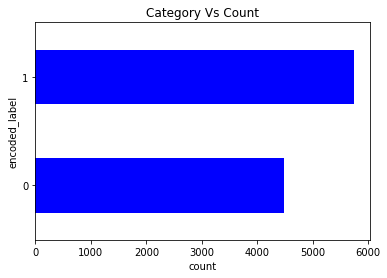

Test Data Fake News Encoded Label  Visualization


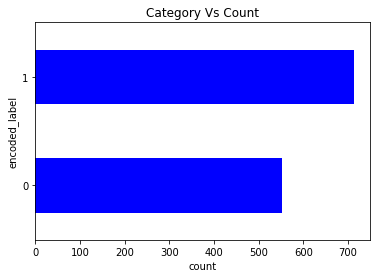

In [0]:

print('Train Data Fake News Encoded Label Visualization')
fake_news_distribution(df_train)

print('Test Data Fake News Encoded Label  Visualization')
fake_news_distribution(df_test)

### Word cloud

In [0]:
#Word Cloud to Visualize important text
# lower max_font_size, change the maximum number of word and lighten the background

def word_cloud_visualization(df):
    text = " ".join(ht for ht in df.processed_headline_text)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Train Data Word Cloud Visualization


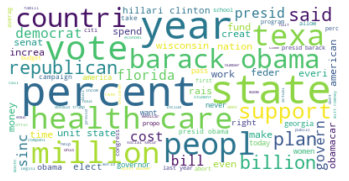

Test Data Word Cloud Visualization


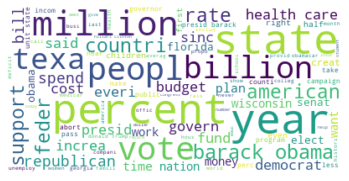

In [0]:
print('Train Data Word Cloud Visualization')
word_cloud_visualization(df_train)

print('Test Data Word Cloud Visualization')
word_cloud_visualization(df_test)

### Word2Vec and t-SNE

In [0]:

num_features = 15      # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

#Create Word2Vec Model. Get Vector from the model
word_tokens = []
for i in range(len(df_train)):
    words = df_train['processed_headline_text'][i].split()
    word_tokens.append(words)
    
word2vec_model = word2vec.Word2Vec(word_tokens, workers=num_workers, size=num_features, min_count = min_word_count, window = context, sample = downsampling)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


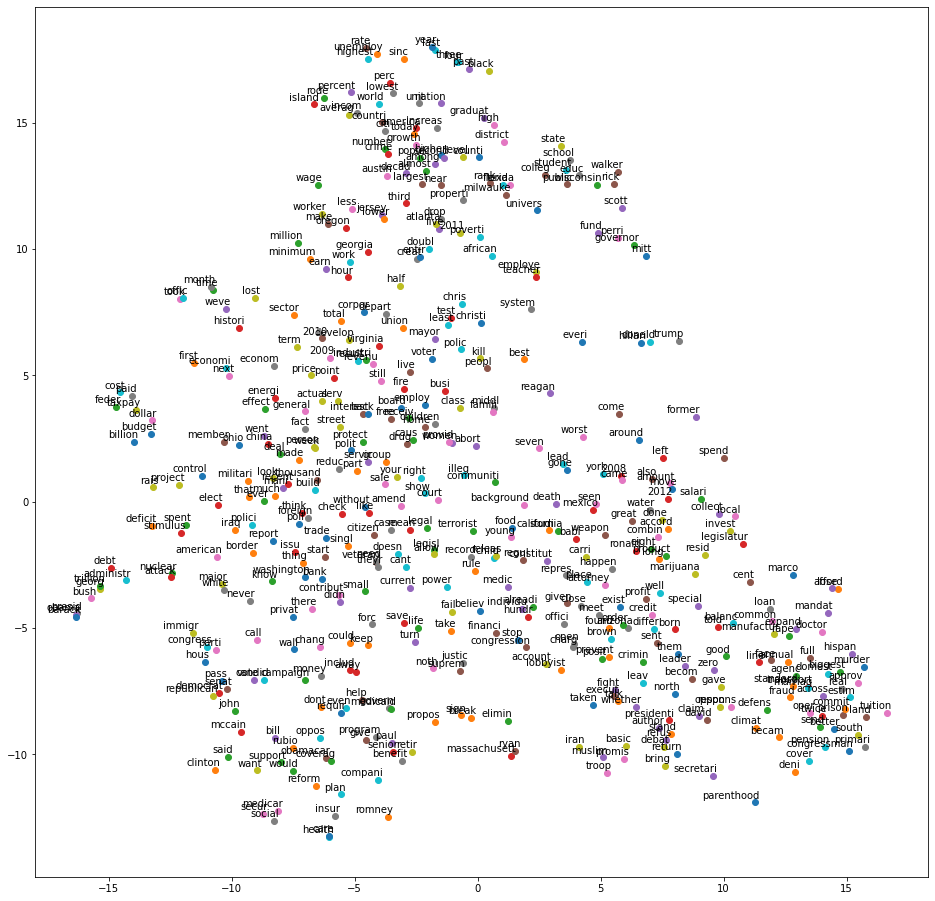

In [0]:
#"Creates and TSNE model and plots it"
from sklearn.manifold import TSNE
def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(word2vec_model)

In [0]:
def create_distribution1(dataFile):
    return sb.countplot(x=labelcolname, data=dataFile, palette='hls')

In [0]:
import seaborn as sb
def create_distribution2(dataFile, colname):
    g = sb.countplot(x=colname, data=dataFile, palette='hls')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    return g

#Factor 1: Sentiment Analysis

In [0]:
snt = senti.polarity_scores(train_news[processedheadlinecolname][0])
print("{:-<40} \n{}".format([processedheadlinecolname][0], str(snt)))
print ([snt['neg'],snt['neu'],snt['pos']])
print (snt['compound'])

processed_headline_text----------------- 
{'neg': 0.134, 'neu': 0.625, 'pos': 0.241, 'compound': 0.296}
[0.134, 0.625, 0.241]
0.296


In [0]:

def identify_sentiment_on_text(text):
    snt = senti.polarity_scores(text)
    # print("{:-<40} \n{}".format(text, str(snt)))
    # print ([snt['neg'],snt['neu'],snt['pos']])
    # print (snt['compound'])
    return pd.Series([snt['compound'], [snt['neg'],snt['neu'],snt['pos']]])

In [0]:
def update_sentiment_results_to_dataset(dataframe,sentimentcolnames,coltoapplysentiment):
    dataframe[sentimentcolnames] = dataframe.apply(
    lambda row: identify_sentiment_on_text(
        row[coltoapplysentiment]), axis=1)
    return dataframe

In [0]:
sentimentcolnames = ['headline_sentiment_compound','headline_sentiment_polarity_vector']
train_news = update_sentiment_results_to_dataset(train_news,sentimentcolnames,processedheadlinecolname)
train_news.head()

test_news = update_sentiment_results_to_dataset(test_news,sentimentcolnames,processedheadlinecolname)
test_news.head()

valid_news = update_sentiment_results_to_dataset(valid_news,sentimentcolnames,processedheadlinecolname)
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,encoded_label,processed_headline_text,index,headline_sentiment_compound,headline_sentiment_polarity_vector
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,0,less american work,0,0.0000,"[0.0, 1.0, 0.0]"
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0,obama sworn offic holi bibl instead kura their...,1,0.0000,"[0.0, 1.0, 0.0]"
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0,organ parad social welfar organ involv polit c...,2,-0.3400,"[0.146, 0.854, 0.0]"
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,1,near half oregon children poor,3,-0.4767,"[0.437, 0.563, 0.0]"
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,1,attack republican various program econom stimu...,4,-0.4767,"[0.193, 0.807, 0.0]"


#Factor 2: LDA Topic Modelling

function to convert text to word tokens from cleaned dataset

In [0]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result

In [0]:
class ProcessedDocuments(object):
    def __init__(self, *arrays):
        self.arrays = arrays
 
    def __iter__(self):
        for array in self.arrays:
            for document in array:
                for sent in nltk.sent_tokenize(document):
                    yield nltk.word_tokenize(sent)

Function to create a word2vec model

In [0]:
def get_word2vec(sentences, location):
    model = gensim.models.Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)
    print('Model done training. Saving to disk as ' + 'models/' + location)
    model.save('models/' + location)
    return model

Function to tokenize docs

In [0]:
def get_tokenized_docs(dataframe,colname):
    documents_locale = dataframe[[colname]]
    tokenized_docs_local = documents_locale[colname].map(get_word_tokens)
    return tokenized_docs_local

function to build the dictionary and tokenized docs for given features

In [0]:
def get_dictionary_print_words(dataframe,colname):
    tokenized_docs_local = get_tokenized_docs(dataframe,colname)
    dictionary_gensim = gensim.corpora.Dictionary(tokenized_docs_local)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim,tokenized_docs_local

function to build bow_corpus from dictionary and tokenized_docs

In [0]:
def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim,tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local,dictionary_gensim

function to build tfidf_corpus from bow_corpus

In [0]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

function to run ldamodel and print top 10 topics

In [0]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

In [0]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

 Function to enrich data with lda topics, lda topics score, top words

In [0]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

function that can enrich topic data to dataframe

In [0]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

## Bag of Words

In [0]:
bow_corpus_headline,dictionary_headline = get_bow_corpus_print_sample(train_news,processedheadlinecolname)

######## DICTIONARY Words and occurences ########
0 abort
1 demand
2 group
3 list
4 nanni
5 polit
6 support
7 third
8 trimest
9 administr
10 begin

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]

 ######## PREVIEW BOW ########
Word 0 ("abort") appears 1 time.
Word 1 ("demand") appears 1 time.
Word 2 ("group") appears 1 time.
Word 3 ("list") appears 1 time.
Word 4 ("polit") appears 1 time.
Word 5 ("support") appears 1 time.
Word 6 ("third") appears 1 time.


## LDA using Bag of Words

In [0]:
lda_model_headline,lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline,10,dictionary_headline)

0::['obama', 'presid', 'barack', 'countri', 'rate', 'american', 'nation', 'peopl', 'state', 'money']
1::['senat', 'middl', 'plan', 'state', 'class', 'romney', 'support', 'john', 'famili', 'take']
2::['year', 'percent', 'feder', 'state', 'govern', 'rate', 'counti', 'school', 'fund', 'unemploy']
3::['year', 'state', 'million', 'billion', 'percent', 'clinton', 'budget', 'hillari', 'cost', 'countri']
4::['percent', 'medicar', 'program', 'state', 'said', 'plan', 'dont', 'vote', 'american', 'obamacar']
5::['peopl', 'state', 'support', 'obama', 'year', 'presid', 'million', 'vote', 'rais', 'secur']
6::['percent', 'state', 'incom', 'unit', 'presid', 'countri', 'number', 'american', 'world', 'democrat']
7::['would', 'bill', 'state', 'immigr', 'year', 'sinc', 'illeg', 'even', 'texa', 'mccain']
8::['budget', 'percent', 'million', 'peopl', 'health', 'island', 'sinc', 'increas', 'plan', 'rode']
9::['health', 'care', 'vote', 'republican', 'state', 'everi', 'year', 'democrat', 'insur', 'percent']


## LDA using TF-IDF

In [0]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 0.3213684467163471),
 (1, 0.45885933393208955),
 (2, 0.3867148870952622),
 (3, 0.4388676762258462),
 (4, 0.3854712129906647),
 (5, 0.25709294587835624),
 (6, 0.3596280760961804)]


In [0]:
lda_tfidf_model_headline = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['world', 'percent', 'bush', 'year', 'john', 'state', 'third', 'vote', 'crist', 'mccain']
1::['year', 'percent', 'billion', 'state', 'obamacar', 'cost', 'romney', 'vote', 'medicar', 'mitt']
2::['obama', 'clinton', 'trump', 'donald', 'hillari', 'barack', 'never', 'said', 'money', 'year']
3::['unemploy', 'obama', 'island', 'percent', 'rode', 'year', 'state', 'peopl', 'border', 'barack']
4::['million', 'state', 'percent', 'year', 'countri', 'allow', 'peopl', 'vote', 'build', 'health']
5::['state', 'school', 'elect', 'public', 'make', 'student', 'year', 'obama', 'bill', 'abort']
6::['health', 'year', 'spend', 'nation', 'peopl', 'trillion', 'everi', 'vote', 'american', 'million']
7::['presid', 'plan', 'obama', 'percent', 'support', 'hous', 'health', 'american', 'women', 'would']
8::['health', 'care', 'medicar', 'state', 'billion', 'percent', 'year', 'obama', 'would', 'vote']
9::['sinc', 'vote', 'obama', 'state', 'presid', 'social', 'busi', 'secur', 'offic', 'nation']


Creating a Word2Vec model with the list of headline_text

In [0]:
# check this code later
'''
w2vec = get_word2vec(
    ProcessedDocuments(
        train_news[processedheadlinecolname].values, 
        test_news[processedheadlinecolname].values, 
        valid_news[processedheadlinecolname].values
    ),
    location1+'Models/w2vmodel'
)

'''

"\nw2vec = get_word2vec(\n    ProcessedDocuments(\n        train_news[processedheadlinecolname].values, \n        test_news[processedheadlinecolname].values, \n        valid_news[processedheadlinecolname].values\n    ),\n    location1+'Models/w2vmodel'\n)\n\n"

In [0]:
semisupervised_headline_topic_labels = ['american_clinton_vote','trump_republic_vote',
                                        'obama_immigr_support','health_care_job',
                                        'employe_percent_secur','school_spend_democrat',
                                        'tax_rais_debt','american_peopl_spend',
                                        'creat_job_million','feder_cost_colleg']

Assigning Topic details to Train, Test and Valid Data Set

In [0]:
headlinetopiccolnames = ['headline_lda_topic_number','headline_lda_topic_score','headline_lda_topic_topwords']
train_news = update_lda_results_to_dataset(
    train_news,headlinetopiccolnames,headlinecolname,
    dictionary_headline,lda_model_headline,lda_headline_topic_words)
train_news.head()

test_news = update_lda_results_to_dataset(
    test_news,headlinetopiccolnames,headlinecolname,
    dictionary_headline,lda_model_headline,lda_headline_topic_words)
test_news.head()

valid_news = update_lda_results_to_dataset(
    valid_news,headlinetopiccolnames,headlinecolname,
    dictionary_headline,lda_model_headline,lda_headline_topic_words)
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,encoded_label,processed_headline_text,index,headline_sentiment_compound,headline_sentiment_polarity_vector,headline_lda_topic_number,headline_lda_topic_score,headline_lda_topic_topwords
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,0,less american work,0,0.0000,"[0.0, 1.0, 0.0]",2,0.549940,year percent feder state govern rate counti sc...
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,0,obama sworn offic holi bibl instead kura their...,1,0.0000,"[0.0, 1.0, 0.0]",8,0.413999,budget percent million peopl health island sin...
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0,organ parad social welfar organ involv polit c...,2,-0.3400,"[0.146, 0.854, 0.0]",5,0.871396,peopl state support obama year presid million ...
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,1,near half oregon children poor,3,-0.4767,"[0.437, 0.563, 0.0]",8,0.774961,budget percent million peopl health island sin...
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,1,attack republican various program econom stimu...,4,-0.4767,"[0.193, 0.807, 0.0]",8,0.678563,budget percent million peopl health island sin...


## LDA2VEC

In [0]:
# check this code later
'''
lda2vec = get_word2vec(
    ProcessedDocuments(
        train_news['headline_lda_topic_topwords'].values, 
        test_news['headline_lda_topic_topwords'].values, 
        valid_news['headline_lda_topic_topwords'].values
    ),
    'lda2vecmodel'
)
'''

"\nlda2vec = get_word2vec(\n    ProcessedDocuments(\n        train_news['headline_lda_topic_topwords'].values, \n        test_news['headline_lda_topic_topwords'].values, \n        valid_news['headline_lda_topic_topwords'].values\n    ),\n    'lda2vecmodel'\n)\n"

In [0]:
# tsne_plot(lda2vec,8,8)

## Adding Feature- Context

In [0]:
contextcolname = 'context'
processedcontextcolname = 'processed_context'

In [0]:
def preprocess_context(text):
    text = lemmatize_stemming(text)
    #print('Lemmatized :: ' + text)
    text = remove_punctuation(text)
    #print('Punctuation removed :: ' + text)
    return text
preprocess_context(str('a floor speech.'))

'a floor speech'

Apply Preprocessing for all datasets on Context

In [0]:
def apply_context_preprocess_dataframe(dflocal):
    dflocal[contextcolname] = dflocal[contextcolname].fillna('others')
    dflocal[processedcontextcolname] = dflocal.apply(
        lambda row: preprocess_context(str(row[contextcolname])), axis=1)
    return dflocal

train_news = apply_context_preprocess_dataframe(train_news)
test_news = apply_context_preprocess_dataframe(test_news)
valid_news = apply_context_preprocess_dataframe(valid_news)

dfcontextunique = train_news
dfcontextunique = dfcontextunique.append([test_news, valid_news])

In [0]:

len(dfcontextunique.context.unique())

5143

In [0]:
bow_corpus_context,dictionary_context = get_bow_corpus_print_sample(dfcontextunique,contextcolname)

######## DICTIONARY Words and occurences ########
0 mailer
1 floor
2 speech
3 denver
4 news
5 release
6 interview
7 online
8 opinion
9 piece
10 press

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1)]

 ######## PREVIEW BOW ########
Word 0 ("mailer") appears 1 time.


##  LDA to get top topics for context

In [0]:
lda_model_context,lda_context_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_context,10,dictionary_context)

0::['interview', 'campaign', 'news', 'show', 'with', 'mailer', 'newspaper', 'appearance', 'commentary', 'sunday']
1::['press', 'release', 'meet', 'post', 'blog', 'facebook', 'iowa', 'media', 'column', 'meme']
2::['speech', 'mail', 'chain', 'newsletter', 'email', 'editorial', 'political', 'board', 'book', 'tampa']
3::['interview', 'debate', 'radio', 'presidential', 'with', 'msnbc', 'republican', 'morning', 'business', 'vegas']
4::['speech', 'convention', 'democratic', 'debate', 'national', 'meeting', 'town', 'hall', 'republican', 'texas']
5::['state', 'speech', 'house', 'floor', 'senate', 'union', 'address', 'hearing', 'committee', 'remarks']
6::['news', 'release', 'statement', 'interview', 'nation', 'article', 'face', 'website', 'campaign', 'jersey']
7::['campaign', 'conference', 'week', 'tweet', 'this', 'press', 'news', 'commercial', 'rally', 'twitter']
8::['television', 'video', 'interview', 'campaign', 'with', 'youtube', 'opinion', 'piece', 'week', 'this']
9::['comments', 'email', '

In [0]:
semisupervised_context_topics = ['interview_campaign_appearance','pressrelease_media',
                                 'book_newsletter','presidential_debate',
                                 'townhall_meeting','senate_house_floor',
                                 'news_release_nation','twitter_online_campaign'
                                'interview_media','public_comments']

Assign context topics back to dataset

In [0]:
contexttopiccolnames = ['context_lda_topic_number','context_lda_topic_score','context_lda_topic_topwords']
contexttopicnamecol = 'context_lda_topic_name'
train_news = update_lda_results_to_dataset(
    train_news,contexttopiccolnames,contextcolname,
    dictionary_context,lda_model_context,lda_context_topic_words)
train_news[contexttopicnamecol] = train_news[processedcontextcolname] = train_news.apply(
        lambda row: semisupervised_context_topics[int(row['context_lda_topic_number'])-1], axis=1)
train_news.head()

test_news = update_lda_results_to_dataset(
    test_news,contexttopiccolnames,contextcolname,
    dictionary_headline,lda_model_headline,lda_headline_topic_words)
test_news[contexttopicnamecol] = test_news[processedcontextcolname] = test_news.apply(
        lambda row: semisupervised_context_topics[int(row['context_lda_topic_number'])-1], axis=1)                                                 
test_news.head()

valid_news = update_lda_results_to_dataset(
    valid_news,contexttopiccolnames,contextcolname,
    dictionary_headline,lda_model_headline,lda_headline_topic_words)
valid_news[contexttopicnamecol] = valid_news[processedcontextcolname] = valid_news.apply(
        lambda row: semisupervised_context_topics[int(row['context_lda_topic_number'])-1], axis=1)
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,encoded_label,processed_headline_text,index,headline_sentiment_compound,headline_sentiment_polarity_vector,headline_lda_topic_number,headline_lda_topic_score,headline_lda_topic_topwords,processed_context,context_lda_topic_number,context_lda_topic_score,context_lda_topic_topwords,context_lda_topic_name
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,0,less american work,0,0.0000,"[0.0, 1.0, 0.0]",2,0.549940,year percent feder state govern rate counti sc...,presidential_debate,4,0.54998,percent medicar program state said plan dont v...,presidential_debate
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,others,0,obama sworn offic holi bibl instead kura their...,1,0.0000,"[0.0, 1.0, 0.0]",8,0.413999,budget percent million peopl health island sin...,public_comments,0,0.10000,obama presid barack countri rate american nati...,public_comments
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0,organ parad social welfar organ involv polit c...,2,-0.3400,"[0.146, 0.854, 0.0]",5,0.871396,peopl state support obama year presid million ...,public_comments,0,0.10000,obama presid barack countri rate american nati...,public_comments
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,1,near half oregon children poor,3,-0.4767,"[0.437, 0.563, 0.0]",8,0.774961,budget percent million peopl health island sin...,public_comments,0,0.10000,obama presid barack countri rate american nati...,public_comments
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,1,attack republican various program econom stimu...,4,-0.4767,"[0.193, 0.807, 0.0]",8,0.678563,budget percent million peopl health island sin...,presidential_debate,4,0.54998,percent medicar program state said plan dont v...,presidential_debate


Saving data for future reference

In [0]:
train_news.to_csv(location+"train_contextlda.csv", sep=',')
test_news.to_csv(location+"test_contextlda.csv", sep=',')
valid_news.to_csv(location+"valid_contextlda.csv", sep=',')

Train News Distribution against context

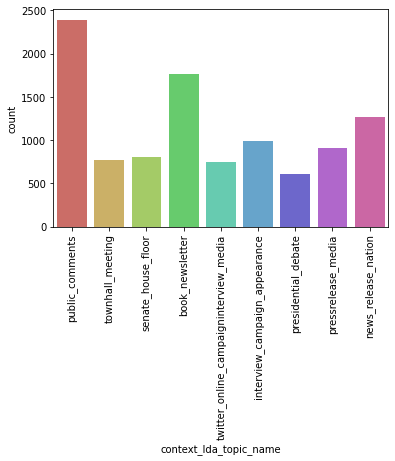

In [0]:
create_distribution2(train_news, contexttopicnamecol)

## Tagging Documents against context Train, Test and Valid

In [0]:
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Function to tag documents

In [0]:
#tag each headline text with the label found in previous step
def tag_headline(data, coltotag, colusedtotag):
    tagged_data = []
    for index, row in data.iterrows():
        tagged_data.append(TaggedDocument(words=get_word_tokens(row[coltotag]), tags=[row[colusedtotag]]))
    return tagged_data

In [0]:
#tag train data and run doc2vec model
context_labelled_headlines_train = tag_headline(train_news, processedheadlinecolname, contexttopicnamecol)
print(context_labelled_headlines_train[:3])

#tag train data and run doc2vec model
context_labelled_headlines_test = tag_headline(test_news, processedheadlinecolname, contexttopicnamecol)
print(context_labelled_headlines_test[:3])

#tag train data and run doc2vec model
context_labelled_headlines_valid = tag_headline(valid_news, processedheadlinecolname, contexttopicnamecol)
print(context_labelled_headlines_valid[:3])

[TaggedDocument(words=['nanni', 'list', 'polit', 'group', 'support', 'third', 'trimest', 'abort', 'demand'], tags=['public_comments']), TaggedDocument(words=['declin', 'coal', 'start', 'start', 'natur', 'took', 'start', 'begin', 'presid', 'georg', 'buse', 'administr'], tags=['townhall_meeting']), TaggedDocument(words=['hillari', 'clinton', 'agre', 'john', 'mccain', 'vote', 'give', 'georg', 'bush', 'benefit', 'doubt', 'iran'], tags=['public_comments'])]
[TaggedDocument(words=['build', 'wall', 'mexico', 'border', 'take', 'liter', 'year'], tags=['public_comments']), TaggedDocument(words=['wisconsin', 'pace', 'doubl', 'number', 'layoff', 'year'], tags=['presidential_debate']), TaggedDocument(words=['john', 'mccain', 'done', 'noth', 'help'], tags=['townhall_meeting'])]
[TaggedDocument(words=['less', 'american', 'work'], tags=['presidential_debate']), TaggedDocument(words=['obama', 'sworn', 'offic', 'holi', 'bibl', 'instead', 'kura', 'their', 'equival', 'bibl', 'differ', 'belief'], tags=['pu

Apply Doc2Vec on Tagged Documents to created doc2vec models

In [0]:
doc2vec_model_train = Doc2Vec(documents = context_labelled_headlines_train,
                              dm=0, num_features=500, min_count=2, size=21, window=4)
doc2vec_model_test= Doc2Vec(documents = context_labelled_headlines_test,
                              dm=0, num_features=500, min_count=2, size=21, window=4)
doc2vec_model_valid= Doc2Vec(documents = context_labelled_headlines_valid,
                              dm=0, num_features=500, min_count=2, size=21, window=4)

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [0]:
#Method to convert doc2vec model and tagged documents into vectors training and testing
def create_vector_for_learning(model, tagged_docs):
    #documents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in tagged_docs])
    return targets, regressors

Doc2Vec Model to Vector converter

In [0]:
def create_docvector(doc2vec_model,label):
    return doc2vec_model.docvecs[label]

Adding vector for every text in the dataset

In [0]:
def apply_context_doc2vec(dflocal,doc2vec_model, vectorcolname, label):
    dflocal[vectorcolname] = dflocal.apply(
        lambda row: create_docvector(doc2vec_model,str(row[label])), axis=1)
    return dflocal

Updating Dataset with vectors identified by Doc2Vec applied on context

In [0]:
contextdoc2veccolumn = 'content_doc2vec_vector'
train_news = apply_context_doc2vec(train_news, doc2vec_model_train,contextdoc2veccolumn,contexttopicnamecol)
train_news.head()

test_news = apply_context_doc2vec(test_news, doc2vec_model_test,contextdoc2veccolumn,contexttopicnamecol)
test_news.head()

valid_news = apply_context_doc2vec(valid_news, doc2vec_model_valid,contextdoc2veccolumn,contexttopicnamecol)
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,encoded_label,processed_headline_text,index,headline_sentiment_compound,headline_sentiment_polarity_vector,headline_lda_topic_number,headline_lda_topic_score,headline_lda_topic_topwords,processed_context,context_lda_topic_number,context_lda_topic_score,context_lda_topic_topwords,context_lda_topic_name,content_doc2vec_vector
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,0,less american work,0,0.0000,"[0.0, 1.0, 0.0]",2,0.549940,year percent feder state govern rate counti sc...,presidential_debate,4,0.54998,percent medicar program state said plan dont v...,presidential_debate,"[-0.27561006, -0.20845567, 0.69365305, -0.2252..."
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,others,0,obama sworn offic holi bibl instead kura their...,1,0.0000,"[0.0, 1.0, 0.0]",8,0.413999,budget percent million peopl health island sin...,public_comments,0,0.10000,obama presid barack countri rate american nati...,public_comments,"[-0.43705103, -0.21916537, 0.81760687, -0.2849..."
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0,organ parad social welfar organ involv polit c...,2,-0.3400,"[0.146, 0.854, 0.0]",5,0.871396,peopl state support obama year presid million ...,public_comments,0,0.10000,obama presid barack countri rate american nati...,public_comments,"[-0.43705103, -0.21916537, 0.81760687, -0.2849..."
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,1,near half oregon children poor,3,-0.4767,"[0.437, 0.563, 0.0]",8,0.774961,budget percent million peopl health island sin...,public_comments,0,0.10000,obama presid barack countri rate american nati...,public_comments,"[-0.43705103, -0.21916537, 0.81760687, -0.2849..."
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,1,attack republican various program econom stimu...,4,-0.4767,"[0.193, 0.807, 0.0]",8,0.678563,budget percent million peopl health island sin...,presidential_debate,4,0.54998,percent medicar program state said plan dont v...,presidential_debate,"[-0.27561006, -0.20845567, 0.69365305, -0.2252..."


In [0]:
create_docvector(doc2vec_model_train,train_news[contexttopicnamecol][0])

array([-0.81439245,  0.26309508,  0.8029219 , -0.13035853,  0.5958502 ,
        0.5071973 , -0.80531895, -1.2003775 ,  0.5126116 , -0.4112202 ,
        0.10460012, -1.8143721 ,  1.1092263 , -1.167736  , -0.4290263 ,
       -0.19258206, -1.5714798 ,  1.0834322 , -0.9350076 ,  0.98791593,
       -1.2961768 ], dtype=float32)

In [0]:
[train_news['headline_lda_topic_score'][0],
           train_news['headline_sentiment_compound'][0],
            create_docvector(doc2vec_model_train,train_news[contexttopicnamecol][0])]

[0.8199604749679565,
 0.296,
 array([-0.81439245,  0.26309508,  0.8029219 , -0.13035853,  0.5958502 ,
         0.5071973 , -0.80531895, -1.2003775 ,  0.5126116 , -0.4112202 ,
         0.10460012, -1.8143721 ,  1.1092263 , -1.167736  , -0.4290263 ,
        -0.19258206, -1.5714798 ,  1.0834322 , -0.9350076 ,  0.98791593,
        -1.2961768 ], dtype=float32)]

In [0]:

print (type(train_news[contextdoc2veccolumn][0]))
np.append(train_news[contextdoc2veccolumn][0],
          (train_news['headline_lda_topic_score'][0],train_news['headline_sentiment_compound'][0]))

##pd.concat([train_news['headline_lda_topic_score'],
           ##train_news['headline_sentiment_compound'],train_news[contextvectorcolumn][0]],axis=1)

<class 'numpy.ndarray'>


array([-0.81439245,  0.26309508,  0.80292189, -0.13035853,  0.59585023,
        0.50719732, -0.80531895, -1.20037746,  0.51261163, -0.41122019,
        0.10460012, -1.81437206,  1.10922635, -1.16773605, -0.42902631,
       -0.19258206, -1.5714798 ,  1.0834322 , -0.93500757,  0.98791593,
       -1.29617679,  0.81996047,  0.296     ])

In [0]:
#### Append LDA, Sentiment, Feature Vector
def apply_feature_distill_vector(dflocal, vectorcolname, doc2veccolname):
    dflocal[vectorcolname] = dflocal.apply(
        lambda row: np.append(row[doc2veccolname],
          (row['headline_lda_topic_score'],row['headline_sentiment_compound'])), axis=1)
    return dflocal

## Creating Feature Vector for Context

* Append Context Feature Doc2Vec column
*Append LDA topic retrieved through distillation
*Append Sentiment Analysis Compount retrieved through distillation

In [0]:
contextfeaturevector = 'contextfeaturevector'

train_news = apply_feature_distill_vector(train_news, contextfeaturevector, contextdoc2veccolumn)
test_news = apply_feature_distill_vector(test_news,contextfeaturevector, contextdoc2veccolumn)
valid_news = apply_feature_distill_vector(valid_news,contextfeaturevector, contextdoc2veccolumn)

train_news.head(3)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,encoded_label,processed_headline_text,index,headline_sentiment_compound,headline_sentiment_polarity_vector,headline_lda_topic_number,headline_lda_topic_score,headline_lda_topic_topwords,processed_context,context_lda_topic_number,context_lda_topic_score,context_lda_topic_topwords,context_lda_topic_name,content_doc2vec_vector,contextfeaturevector
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0,nanni list polit group support third trimest a...,0,0.296,"[0.134, 0.625, 0.241]",5,0.819960,peopl state support obama year presid million ...,public_comments,0,0.549999,interview campaign news show with mailer newsp...,public_comments,"[-0.81439245, 0.26309508, 0.8029219, -0.130358...","[-0.8143924474716187, 0.26309508085250854, 0.8..."
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1,declin coal start start natur took start begin...,1,0.000,"[0.0, 1.0, 0.0]",1,0.849965,senat middl plan state class romney support jo...,townhall_meeting,5,0.699973,state speech house floor senate union address ...,townhall_meeting,"[0.5639894, 1.3264073, -0.03396838, -0.2111169...","[0.5639894008636475, 1.3264073133468628, -0.03..."
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,1,hillari clinton agre john mccain vote give geo...,2,0.128,"[0.161, 0.645, 0.194]",7,0.723427,would bill state immigr year sinc illeg even t...,public_comments,9,0.549991,comments email letter others website post colu...,public_comments,"[-0.81439245, 0.26309508, 0.8029219, -0.130358...","[-0.8143924474716187, 0.26309508085250854, 0.8..."


In [0]:
def getcontextfeaturetrainvector():
    sentiment = train_news.headline_sentiment_compound.reset_index()['headline_sentiment_compound']
    topic = train_news.headline_lda_topic_score.reset_index()['headline_lda_topic_score']
    context_doc2vec = []
    for i in range(len(train_news[contexttopicnamecol])):
        context_value = train_news[contexttopicnamecol][i]
        context = doc2vec_model_train[context_value]
        context_doc2vec.append(context)
    
    context_vector = pd.concat([sentiment,topic, pd.DataFrame(context_doc2vec)],axis=1)
    return context_vector

In [0]:
def getcontextfeaturetestvector():
    sentiment = test_news.headline_sentiment_compound.reset_index()['headline_sentiment_compound']
    topic = test_news.headline_lda_topic_score.reset_index()['headline_lda_topic_score']
    context_doc2vec = []
    for i in range(len(test_news[contexttopicnamecol])):
        context_value = test_news[contexttopicnamecol][i]
        context = doc2vec_model_test[context_value]
        context_doc2vec.append(context)
    
    context_vector = pd.concat([sentiment,topic, pd.DataFrame(context_doc2vec)],axis=1)
    return context_vector

In [0]:
context_vector = getcontextfeaturetrainvector()

In [0]:
context_vector_test = getcontextfeaturetestvector()

In [0]:
#Get train and test data for classification
X_train = getcontextfeaturetrainvector()
y_train = train_news['encoded_label']

X_test = getcontextfeaturetestvector()
y_test = test_news['encoded_label']

In [0]:
#Method to calculate model accuracy, precision
def estimate_score(y_test, y_pred):
    score(y_test, y_pred, average='macro')
    precision, recall, fscore, support = score(y_test, y_pred)
    
    print('accuracy: {}'.format(accuracy_score(y_test,y_pred)*100))
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))

In [0]:

#perform vector classification using Logistic Regression
from sklearn.linear_model import  LogisticRegression
fake_news_classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
fake_news_classifier.fit(X_train, y_train)
y_pred = fake_news_classifier.predict(X_test)
estimate_score(y_test, y_pred)

accuracy: 56.353591160220994
precision: [0.         0.56353591]
recall: [0. 1.]
fscore: [0.         0.72084806]
support: [553 714]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
feature = []
for index,row in X_test.iterrows():
    feature.append(row.tolist())
    
final_data = []
for i in range(len(test_news)):
    data = {}
    headline = test_news['headline_text'][i]
    encoded_label = test_news['encoded_label'][i]
    context_vector = feature[i]
    
    data = {'headline_text':headline, 'encoded_label':encoded_label, 'context_vector':context_vector}
    final_data.append(data)

test_feature = pd.DataFrame(final_data)
test_feature.to_csv(location+"test_contextfeature.csv", sep=',')

In [0]:
feature = []
for index,row in X_train.iterrows():
    feature.append(row.tolist())
    
final_data = []
for i in range(len(train_news)):
    data = {}
    headline = train_news['headline_text'][i]
    encoded_label = train_news['encoded_label'][i]
    context_vector = feature[i]
    
    data = {'headline_text':headline, 'encoded_label':encoded_label, 'context_vector':context_vector}
    final_data.append(data)

train_feature = pd.DataFrame(final_data)
train_feature.to_csv(location+"train_contextfeature.csv", sep=',')

In [0]:
train_news.to_csv(location+"train_contextfeature.csv", sep=',')
test_news.to_csv(location+"test_contextfeature.csv", sep=',')
valid_news.to_csv(location+"valid_contextfeature.csv", sep=',')

#Factor 3: Sensational Feature Analysis

# Factor 4: Political Affiliation Model

## Analysis on Political Affiliation Distribution

In [0]:

def political_affiliation_distribution(df):
    #Training data set with text, domain ranking and type.
    X = df[['processed_headline_text', 'partyaffiliation']]

    plt.title('Category Vs Count')
    X.groupby(['partyaffiliation']).size().plot(kind='barh', color='blue')
    plt.xlabel('count')
    plt.show()

In [0]:
def political_affiliation_distribution(df):
    #Training data set with text, domain ranking and type.
    X = df[['processed_headline_text', 'partyaffiliation']]

    plt.title('Category Vs Count')
    X.groupby(['partyaffiliation']).size().plot(kind='barh', color='blue')
    plt.xlabel('count')
    plt.show()

From the Distribution graphs below we notice that data is distributed highly between 4 labels Democrat, Republican, Independent and None. For understanding the classification based on political affiliation, I will consider only these 4 labels. I will also encode all the other tags as Other

Train Data Party Affiliation Label Distribution Visualization


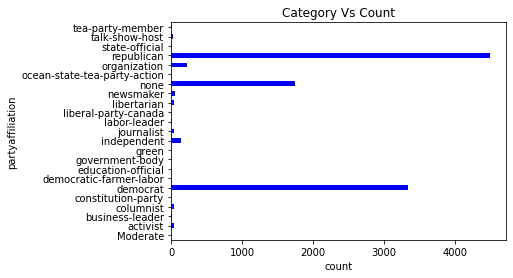

Test Data Party Affiliation Label Distribution Visualization


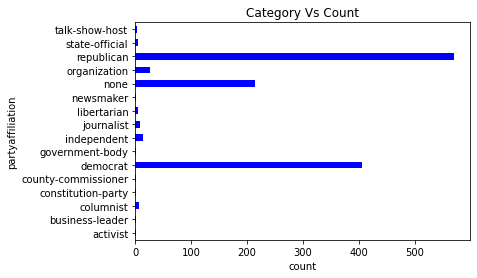

In [0]:
print('Train Data Party Affiliation Label Distribution Visualization')
political_affiliation_distribution(df_train)

print('Test Data Party Affiliation Label Distribution Visualization')
political_affiliation_distribution(df_test)

## Label encoding : Political Party

In [0]:
#label encoding
labels = ['democrat','republican','independent']

def encode_party_affiliation_type(input_label):
    if input_label not in labels:
        return str('other')
    else:
        return input_label

Train Data Party Affiliation Encoded Label Distribution Visualization


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


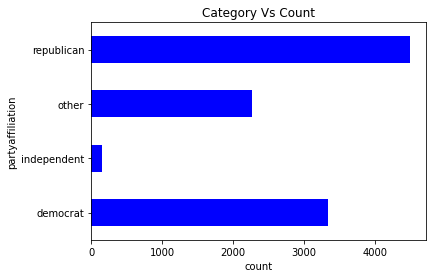

Test Data Party Affiliation Encoded Label Distribution Visualization


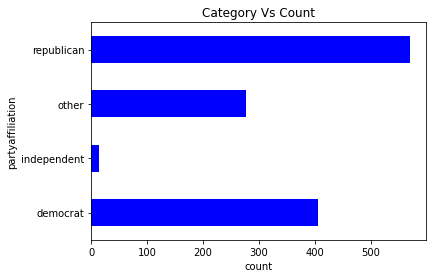

In [0]:
df_train['partyaffiliation'] = df_train.apply(lambda row: encode_party_affiliation_type(row['partyaffiliation']), axis=1)
df_test['partyaffiliation'] = df_test.apply(lambda row: encode_party_affiliation_type(row['partyaffiliation']), axis=1)

print('Train Data Party Affiliation Encoded Label Distribution Visualization')
political_affiliation_distribution(df_train)

print('Test Data Party Affiliation Encoded Label Distribution Visualization')
political_affiliation_distribution(df_test)

Party affilition labels are encoded as follows: 1: Republican, 2: Democrat, 3:Other, 4:Independent. I have considered the distribution of labels for encoding. As more records are Republican I have assigned the least values label to avoid bias due to more data being present.

In [0]:
#encode party affiliation labels
def convert_partyaffiliation_category(df):
    partyaffiliation_dict = {'independent':4, 'other':3, 'democrat':2, 'republican':1}
    pa = []
    for index,row in df.iterrows():
        pa.append(partyaffiliation_dict[row['partyaffiliation']])
    return pa

pa_encode_train = pd.DataFrame(convert_partyaffiliation_category(df_train))
df_train['partyaffiliation_encode'] = pa_encode_train

pa_encode_test = pd.DataFrame(convert_partyaffiliation_category(df_test))
df_test['partyaffiliation_encode'] = pa_encode_test

df_train.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,headline_text,processed_headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,context,encoded_label,partyaffiliation_encode
0,Says the Annies List political group supports ...,nanni list polit group support third trimest a...,abortion,dwayne-bohac,State representative,Texas,republican,a mailer,0,1
1,When did the decline of coal start? It started...,declin coal start start natur took start begin...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,a floor speech.,1,2
2,"Hillary Clinton agrees with John McCain ""by vo...",hillari clinton agre john mccain vote give geo...,foreign-policy,barack-obama,President,Illinois,democrat,Denver,1,2
3,Health care reform legislation is likely to ma...,health care reform legisl like mandat free cha...,health-care,blog-posting,NaN,NaN,other,a news release,0,3
4,The economic turnaround started at the end of ...,econom turnaround start term,"economy,jobs",charlie-crist,NaN,Florida,democrat,an interview on CNN,1,2


## TF-IDF

* Based on party affiliaition feature present in the Liar Liar data set, I have identified the top most occuring words for each of the category.
* Use this as the dictionary and perform a manual TF-IDF evaluation.
* Classify TF-IDF vectors into different political affiliation.

In [0]:
#Method to find the frequency of words per party affiliation tag
def find_freq_dist_per_party(df, label):
    frequencty_dist = []
    data = df[df['partyaffiliation'] == str(label)]
    text_str = ' '.join(data['processed_headline_text'])
    allWords = nltk.tokenize.word_tokenize(text_str)
    allWordsDist = nltk.FreqDist(w.lower() for w in allWords)
    for word, frequency in allWordsDist.most_common(10):
        dist = {"word":word, 'frequency':frequency, 'label':label}
        frequencty_dist.append(dist)
    return frequencty_dist

In [0]:
frequency_dist = find_freq_dist_per_party(df_train, 'democrat')
frequency_dist.extend(find_freq_dist_per_party(df_train, 'republican'))
frequency_dist.extend(find_freq_dist_per_party(df_train, 'independent'))
frequency_dist.extend(find_freq_dist_per_party(df_train, 'other'))

party_affiliation_dict = pd.DataFrame(frequency_dist)

In [0]:

#Find frequency of dictionary in each doc
#Divide by total number of words in dictionary
def computeTF(df, dictionary):
    TF = []
    dict_words = dictionary['word'].unique()
    for index, row in df.iterrows():
        row_freq = []
        words = row['processed_headline_text'].split()
        for i in range(len(dict_words)):
            frequency = float(words.count(dict_words[i])/len(dict_words))
            row_freq.append(frequency)
        TF.append(row_freq)
    return TF

In [0]:
#Calculate IDF for the dictionary
import math
def computeIDF(df, dictionary):
    IDF = []
    dict_words = dictionary['word'].unique()
    num_of_docs = len(df)
    for i in range(len(dict_words)):
        count = 0
        for index,row in df.iterrows():
            if dict_words[i] in row['processed_headline_text']:
                count += 1
        IDF.append(math.log(num_of_docs/count))
    return IDF

In [0]:

#Calculate TF-IDF for each headline text based on the dictionary created
def computeTFIDF(TF, IDF):
    TFIDF = []
    IDF = np.asarray(IDF)
    for j in TF:
        tfidf = np.asarray(j) * IDF.T
        TFIDF.append(tfidf)
    return TFIDF

In [0]:


#Method to calculate model accuracy, precision
def estimate_score(y_test, y_pred):
    score(y_test, y_pred, average='macro')
    precision, recall, fscore, support = score(y_test, y_pred)
    
    print('accuracy: {}'.format(accuracy_score(y_test,y_pred)*100))
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))

In [0]:
#TF-IDF for train data
TF_scores = computeTF(df_train, party_affiliation_dict)
IDF_scores = computeIDF(df_train, party_affiliation_dict)
TFIDF_scores = computeTFIDF(TF_scores, IDF_scores)

In [0]:
#TF-IDF for test data
TF_test_scores = computeTF(df_test, party_affiliation_dict)
IDF_test_scores = computeIDF(df_test, party_affiliation_dict)
TFIDF_stest_cores = computeTFIDF(TF_test_scores, IDF_test_scores)

## Classification based on TF-IDF

### Logistic Refression

In [0]:
#Political affiliation classification based on TF-IDF
from sklearn.linear_model import LogisticRegression
X, y = TFIDF_scores, df_train['partyaffiliation_encode']
logistic_regression = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
clf = logistic_regression.fit(X, y)
y_pred = logistic_regression.predict(TFIDF_stest_cores)
estimate_score(df_test['partyaffiliation_encode'], y_pred)

accuracy: 43.56748224151539
precision: [0.45242215 0.26126126 0.         0.        ]
recall: [0.91593695 0.07142857 0.         0.        ]
fscore: [0.60567458 0.11218569 0.         0.        ]
support: [571 406 276  14]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [0]:
f_cov = RandomForestClassifier(n_estimators=10)
f_cov.fit(X, y)
y_pred = f_cov.predict(TFIDF_stest_cores)

In [0]:
from sklearn import metrics

'Accuracy', metrics.accuracy_score(df_test['partyaffiliation_encode'], y_pred)

('Accuracy', 0.43804262036306235)

# Factor 5: Clickbait

Steps to accomplish

* Identify ways to increase clickbait

> *Length of Headline

> *Question mark

> *Exclamation

> *Caps Ratio

* Enrich dataset with new topic labels as defined above
* If any of the above is present then it is marked as clickbait
* Tag the documents using gensim tagging
* Apply doc2vec on the tagged documents
* Distill it with LDA topics on headline
* Distill it with Sentiment Analysis on headline
* New vector formed will be part of our polynomial equation

## Identify Exclamation

In [0]:
def get_exclamation(text):
    if '!' in text:
        return 1
    else:
        return 0

## Identify Questionmark

In [0]:
def get_question(text):
    if '?' in text:
        return 1
    else:
        return 0

## Length of CAPS_RATIO

In [0]:

def get_caps_ratio(text):
    temp_np_title = text.strip(string.punctuation).split()
    np_title = [word.strip(string.punctuation) for word in temp_np_title]
    final_title = [word for word in np_title if word not in set(stopwords.words('english'))]
    final_title = " ".join(final_title)
    num_caps = len([elem for elem in final_title if elem.isupper()])
    num_words = len([elem for elem in final_title if elem == ' ']) + 1
    ratio = num_caps / num_words
    return ratio

## Enrich dataset 

with presence of exclamation,caps_ratio,questionmark and length

In [0]:
clickbait_features = ['question','exclamation','caps_ratio','length_of_text']
def update_data_set_for_clickbait_features(dataframe):
    dataframe[clickbait_features] = dataframe.apply(lambda row: pd.Series([get_question(row[headlinecolname]), get_exclamation(row[headlinecolname]),get_caps_ratio(row[headlinecolname]),str(len(row[headlinecolname]))]),axis=1)
    return dataframe

In [0]:
train_news.head(3)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,encoded_label,processed_headline_text,index,headline_sentiment_compound,headline_sentiment_polarity_vector,headline_lda_topic_number,headline_lda_topic_score,headline_lda_topic_topwords,processed_context,context_lda_topic_number,context_lda_topic_score,context_lda_topic_topwords,context_lda_topic_name,content_doc2vec_vector,contextfeaturevector
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0,nanni list polit group support third trimest a...,0,0.296,"[0.134, 0.625, 0.241]",5,0.819960,peopl state support obama year presid million ...,public_comments,0,0.549999,interview campaign news show with mailer newsp...,public_comments,"[-0.81439245, 0.26309508, 0.8029219, -0.130358...","[-0.8143924474716187, 0.26309508085250854, 0.8..."
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1,declin coal start start natur took start begin...,1,0.000,"[0.0, 1.0, 0.0]",1,0.849965,senat middl plan state class romney support jo...,townhall_meeting,5,0.699973,state speech house floor senate union address ...,townhall_meeting,"[0.5639894, 1.3264073, -0.03396838, -0.2111169...","[0.5639894008636475, 1.3264073133468628, -0.03..."
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,1,hillari clinton agre john mccain vote give geo...,2,0.128,"[0.161, 0.645, 0.194]",7,0.723427,would bill state immigr year sinc illeg even t...,public_comments,9,0.549991,comments email letter others website post colu...,public_comments,"[-0.81439245, 0.26309508, 0.8029219, -0.130358...","[-0.8143924474716187, 0.26309508085250854, 0.8..."


In [0]:
train_news = update_data_set_for_clickbait_features(train_news)
train_news.head()

test_news = update_data_set_for_clickbait_features(test_news)
test_news.head()

valid_news = update_data_set_for_clickbait_features(valid_news)
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,encoded_label,processed_headline_text,index,headline_sentiment_compound,headline_sentiment_polarity_vector,headline_lda_topic_number,headline_lda_topic_score,headline_lda_topic_topwords,processed_context,context_lda_topic_number,context_lda_topic_score,context_lda_topic_topwords,context_lda_topic_name,content_doc2vec_vector,contextfeaturevector,question,exclamation,caps_ratio,length_of_text
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,0,less american work,0,0.0000,"[0.0, 1.0, 0.0]",2,0.549940,year percent feder state govern rate counti sc...,presidential_debate,4,0.54998,percent medicar program state said plan dont v...,presidential_debate,"[-0.27561006, -0.20845567, 0.69365305, -0.2252...","[-0.2756100594997406, -0.2084556668996811, 0.6...",0,0,0.400000,51
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,others,0,obama sworn offic holi bibl instead kura their...,1,0.0000,"[0.0, 1.0, 0.0]",8,0.413999,budget percent million peopl health island sin...,public_comments,0,0.10000,obama presid barack countri rate american nati...,public_comments,"[-0.43705103, -0.21916537, 0.81760687, -0.2849...","[-0.43705102801322937, -0.2191653698682785, 0....",0,0,0.812500,148
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0,organ parad social welfar organ involv polit c...,2,-0.3400,"[0.146, 0.854, 0.0]",5,0.871396,peopl state support obama year presid million ...,public_comments,0,0.10000,obama presid barack countri rate american nati...,public_comments,"[-0.43705103, -0.21916537, 0.81760687, -0.2849...","[-0.43705102801322937, -0.2191653698682785, 0....",0,0,0.111111,204
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,1,near half oregon children poor,3,-0.4767,"[0.437, 0.563, 0.0]",8,0.774961,budget percent million peopl health island sin...,public_comments,0,0.10000,obama presid barack countri rate american nati...,public_comments,"[-0.43705103, -0.21916537, 0.81760687, -0.2849...","[-0.43705102801322937, -0.2191653698682785, 0....",0,0,0.333333,46
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,1,attack republican various program econom stimu...,4,-0.4767,"[0.193, 0.807, 0.0]",8,0.678563,budget percent million peopl health island sin...,presidential_debate,4,0.54998,percent medicar program state said plan dont v...,presidential_debate,"[-0.27561006, -0.20845567, 0.69365305, -0.2252...","[-0.2756100594997406, -0.2084556668996811, 0.6...",0,0,0.166667,190


Adding clickbait label with yes or no

In [0]:
def clickbait(question,exclamation,caps_ratio, text_length):
    if any([question==1, exclamation==1 , caps_ratio > 1]):
        return 'yes'
    return 'no'

In [0]:
clickbaitfeature = 'clickbait_feature'
def update_data_set_for_clickbait_label(dataframe):
    dataframe['clickbait_feature'] = dataframe.apply(lambda row: clickbait(row['question'],
                                                                            row['exclamation'],
                                                                            row['caps_ratio'],
                                                                           int(row['length_of_text'])), axis=1)
    return dataframe

In [0]:
train_news = update_data_set_for_clickbait_label(train_news)
train_news.head()

test_news = update_data_set_for_clickbait_label(test_news)
test_news.head()

valid_news = update_data_set_for_clickbait_label(valid_news)
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,encoded_label,processed_headline_text,index,headline_sentiment_compound,headline_sentiment_polarity_vector,headline_lda_topic_number,headline_lda_topic_score,headline_lda_topic_topwords,processed_context,context_lda_topic_number,context_lda_topic_score,context_lda_topic_topwords,context_lda_topic_name,content_doc2vec_vector,contextfeaturevector,question,exclamation,caps_ratio,length_of_text,clickbait_feature
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,0,less american work,0,0.0000,"[0.0, 1.0, 0.0]",2,0.549940,year percent feder state govern rate counti sc...,presidential_debate,4,0.54998,percent medicar program state said plan dont v...,presidential_debate,"[-0.27561006, -0.20845567, 0.69365305, -0.2252...","[-0.2756100594997406, -0.2084556668996811, 0.6...",0,0,0.400000,51,no
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,others,0,obama sworn offic holi bibl instead kura their...,1,0.0000,"[0.0, 1.0, 0.0]",8,0.413999,budget percent million peopl health island sin...,public_comments,0,0.10000,obama presid barack countri rate american nati...,public_comments,"[-0.43705103, -0.21916537, 0.81760687, -0.2849...","[-0.43705102801322937, -0.2191653698682785, 0....",0,0,0.812500,148,no
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0,organ parad social welfar organ involv polit c...,2,-0.3400,"[0.146, 0.854, 0.0]",5,0.871396,peopl state support obama year presid million ...,public_comments,0,0.10000,obama presid barack countri rate american nati...,public_comments,"[-0.43705103, -0.21916537, 0.81760687, -0.2849...","[-0.43705102801322937, -0.2191653698682785, 0....",0,0,0.111111,204,no
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,1,near half oregon children poor,3,-0.4767,"[0.437, 0.563, 0.0]",8,0.774961,budget percent million peopl health island sin...,public_comments,0,0.10000,obama presid barack countri rate american nati...,public_comments,"[-0.43705103, -0.21916537, 0.81760687, -0.2849...","[-0.43705102801322937, -0.2191653698682785, 0....",0,0,0.333333,46,no
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,1,attack republican various program econom stimu...,4,-0.4767,"[0.193, 0.807, 0.0]",8,0.678563,budget percent million peopl health island sin...,presidential_debate,4,0.54998,percent medicar program state said plan dont v...,presidential_debate,"[-0.27561006, -0.20845567, 0.69365305, -0.2252...","[-0.2756100594997406, -0.2084556668996811, 0.6...",0,0,0.166667,190,no


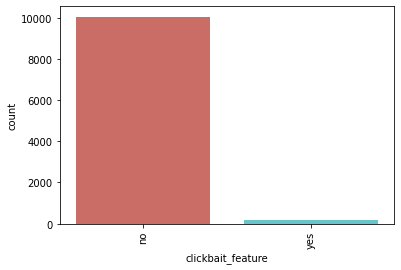

In [0]:
create_distribution2(train_news,'clickbait_feature')

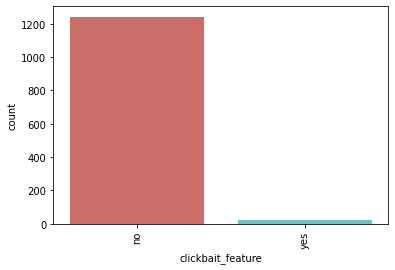

In [0]:
create_distribution2(test_news,'clickbait_feature')

## Tagging
Tag Documents against context Train, Test and Valid

In [0]:
#tag each headline text with the label found in previous step
from gensim.models.doc2vec import TaggedDocument
def tag_headline(data, coltotag, colusedtotag):
    tagged_data = []
    for index, row in data.iterrows():
        tagged_data.append(TaggedDocument(words=get_word_tokens(row[coltotag]), tags=[row[colusedtotag]]))
    return tagged_data

In [0]:
#tag train data and run doc2vec model
clickbait_labelled_headlines_train = tag_headline(train_news, processedheadlinecolname, clickbaitfeature)
print(clickbait_labelled_headlines_train[:3])

#tag train data and run doc2vec model
clickbait_labelled_headlines_test = tag_headline(test_news, processedheadlinecolname, clickbaitfeature)
print(clickbait_labelled_headlines_test[:3])

#tag train data and run doc2vec model
clickbait_labelled_headlines_valid = tag_headline(valid_news, processedheadlinecolname, clickbaitfeature)
print(clickbait_labelled_headlines_valid[:3])

[TaggedDocument(words=['nanni', 'list', 'polit', 'group', 'support', 'third', 'trimest', 'abort', 'demand'], tags=['no']), TaggedDocument(words=['declin', 'coal', 'start', 'start', 'natur', 'took', 'start', 'begin', 'presid', 'georg', 'buse', 'administr'], tags=['yes']), TaggedDocument(words=['hillari', 'clinton', 'agre', 'john', 'mccain', 'vote', 'give', 'georg', 'bush', 'benefit', 'doubt', 'iran'], tags=['no'])]
[TaggedDocument(words=['build', 'wall', 'mexico', 'border', 'take', 'liter', 'year'], tags=['no']), TaggedDocument(words=['wisconsin', 'pace', 'doubl', 'number', 'layoff', 'year'], tags=['no']), TaggedDocument(words=['john', 'mccain', 'done', 'noth', 'help'], tags=['no'])]
[TaggedDocument(words=['less', 'american', 'work'], tags=['no']), TaggedDocument(words=['obama', 'sworn', 'offic', 'holi', 'bibl', 'instead', 'kura', 'their', 'equival', 'bibl', 'differ', 'belief'], tags=['no']), TaggedDocument(words=['organ', 'parad', 'social', 'welfar', 'organ', 'involv', 'polit', 'combat

## Apply Doc2Vec on Tagged Documents to created doc2vec models

In [0]:
from gensim.models import Doc2Vec
doc2vec_model_clickbait_train = Doc2Vec(documents = clickbait_labelled_headlines_train,
                              dm=0, num_features=500, min_count=2, size=21, window=4)
doc2vec_model_clickbait_test= Doc2Vec(documents = clickbait_labelled_headlines_test,
                              dm=0, num_features=500, min_count=2, size=21, window=4)
doc2vec_model_clickbait_valid= Doc2Vec(documents = clickbait_labelled_headlines_valid,
                              dm=0, num_features=500, min_count=2, size=21, window=4)

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


Add vector for every text in the dataset

In [0]:
def create_docvector(doc2vec_model,label):
    return doc2vec_model.docvecs[label]

In [0]:

def apply_clickbait_doc2vec(dflocal,doc2vec_model, vectorcolname, label):
    dflocal[vectorcolname] = dflocal.apply(
        lambda row: create_docvector(doc2vec_model,str(row[label])), axis=1)
    return dflocal

Update Dataset with vectors identified by Doc2Vec applied on context

In [0]:

clickbaitdoc2veccolumn = 'clickbait_doc2vec_vector'
train_news = apply_clickbait_doc2vec(train_news, doc2vec_model_clickbait_train,clickbaitdoc2veccolumn,'clickbait_feature')
train_news.head()

test_news = apply_clickbait_doc2vec(test_news, doc2vec_model_clickbait_test,clickbaitdoc2veccolumn,'clickbait_feature')
test_news.head()

valid_news = apply_clickbait_doc2vec(valid_news, doc2vec_model_clickbait_valid,clickbaitdoc2veccolumn,'clickbait_feature')
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,encoded_label,processed_headline_text,index,headline_sentiment_compound,headline_sentiment_polarity_vector,headline_lda_topic_number,headline_lda_topic_score,headline_lda_topic_topwords,processed_context,context_lda_topic_number,context_lda_topic_score,context_lda_topic_topwords,context_lda_topic_name,content_doc2vec_vector,contextfeaturevector,question,exclamation,caps_ratio,length_of_text,clickbait_feature,clickbait_doc2vec_vector
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,0,less american work,0,0.0000,"[0.0, 1.0, 0.0]",2,0.549940,year percent feder state govern rate counti sc...,presidential_debate,4,0.54998,percent medicar program state said plan dont v...,presidential_debate,"[-0.27561006, -0.20845567, 0.69365305, -0.2252...","[-0.2756100594997406, -0.2084556668996811, 0.6...",0,0,0.400000,51,no,"[0.19795406, -1.5008004, 0.7583566, -0.1748866..."
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,others,0,obama sworn offic holi bibl instead kura their...,1,0.0000,"[0.0, 1.0, 0.0]",8,0.413999,budget percent million peopl health island sin...,public_comments,0,0.10000,obama presid barack countri rate american nati...,public_comments,"[-0.43705103, -0.21916537, 0.81760687, -0.2849...","[-0.43705102801322937, -0.2191653698682785, 0....",0,0,0.812500,148,no,"[0.19795406, -1.5008004, 0.7583566, -0.1748866..."
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,0,organ parad social welfar organ involv polit c...,2,-0.3400,"[0.146, 0.854, 0.0]",5,0.871396,peopl state support obama year presid million ...,public_comments,0,0.10000,obama presid barack countri rate american nati...,public_comments,"[-0.43705103, -0.21916537, 0.81760687, -0.2849...","[-0.43705102801322937, -0.2191653698682785, 0....",0,0,0.111111,204,no,"[0.19795406, -1.5008004, 0.7583566, -0.1748866..."
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,1,near half oregon children poor,3,-0.4767,"[0.437, 0.563, 0.0]",8,0.774961,budget percent million peopl health island sin...,public_comments,0,0.10000,obama presid barack countri rate american nati...,public_comments,"[-0.43705103, -0.21916537, 0.81760687, -0.2849...","[-0.43705102801322937, -0.2191653698682785, 0....",0,0,0.333333,46,no,"[0.19795406, -1.5008004, 0.7583566, -0.1748866..."
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,1,attack republican various program econom stimu...,4,-0.4767,"[0.193, 0.807, 0.0]",8,0.678563,budget percent million peopl health island sin...,presidential_debate,4,0.54998,percent medicar program state said plan dont v...,presidential_debate,"[-0.27561006, -0.20845567, 0.69365305, -0.2252...","[-0.2756100594997406, -0.2084556668996811, 0.6...",0,0,0.166667,190,no,"[0.19795406, -1.5008004, 0.7583566, -0.1748866..."


In [0]:

create_docvector(doc2vec_model_clickbait_train,train_news['clickbait_feature'][0])

array([ 0.16407333, -1.2554379 ,  0.6350085 , -0.14647256,  0.47885135,
       -0.20547059, -0.29871958, -1.2014544 ,  0.52819014, -1.1157101 ,
        0.01550871, -0.2107303 ,  0.36111447,  0.3182591 ,  1.3241348 ,
        1.2999365 ,  0.15610081, -0.24243677, -0.18559407, -1.330279  ,
       -1.0860528 ], dtype=float32)

In [0]:
[train_news['headline_lda_topic_score'][0],
           train_news['headline_sentiment_compound'][0],
            create_docvector(doc2vec_model_train,train_news[contexttopicnamecol][0])]

[0.8199604749679565,
 0.296,
 array([-0.81439245,  0.26309508,  0.8029219 , -0.13035853,  0.5958502 ,
         0.5071973 , -0.80531895, -1.2003775 ,  0.5126116 , -0.4112202 ,
         0.10460012, -1.8143721 ,  1.1092263 , -1.167736  , -0.4290263 ,
        -0.19258206, -1.5714798 ,  1.0834322 , -0.9350076 ,  0.98791593,
        -1.2961768 ], dtype=float32)]

In [0]:
def getclickbaitfeaturetrainvector():
    sentiment = train_news.headline_sentiment_compound.reset_index()['headline_sentiment_compound']
    topic = train_news.headline_lda_topic_score.reset_index()['headline_lda_topic_score']
    clickbait_doc2vec = []
    for i in range(len(train_news['clickbait_feature'])):
        clickbait_value = train_news['clickbait_feature'][i]
        clickbait = doc2vec_model_clickbait_train[clickbait_value]
        clickbait_doc2vec.append(clickbait)
    
    clickbait_vector = pd.concat([sentiment,topic, pd.DataFrame(clickbait_doc2vec)],axis=1)
    return clickbait_vector

In [0]:
def getclickbaitfeaturetestvector():
    sentiment = test_news.headline_sentiment_compound.reset_index()['headline_sentiment_compound']
    topic = test_news.headline_lda_topic_score.reset_index()['headline_lda_topic_score']
    clickbait_doc2vec = []
    for i in range(len(test_news['clickbait_feature'])):
        clickbait_value = test_news['clickbait_feature'][i]
        clickbait = doc2vec_model_clickbait_test[clickbait_value]
        clickbait_doc2vec.append(clickbait)
    
    clickbait_vector = pd.concat([sentiment,topic, pd.DataFrame(clickbait_doc2vec)],axis=1)
    return clickbait_vector

In [0]:
clickbait_vector = getclickbaitfeaturetrainvector()

In [0]:
clickbait_vector_test = getclickbaitfeaturetestvector()

In [0]:
#Get train and test data for classification
X_train = clickbait_vector
y_train = train_news['encoded_label']

X_test = clickbait_vector_test
y_test = test_news['encoded_label']

## Classification using Logistic Regression

In [0]:
#perform vector classification using Logistic Regression
from sklearn.linear_model import  LogisticRegression
fake_news_classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
fake_news_classifier.fit(X_train, y_train)
y_pred = fake_news_classifier.predict(X_test)
estimate_score(y_test, y_pred)

accuracy: 52.56511444356748
precision: [0.42638037 0.56004251]
recall: [0.25135624 0.73809524]
fscore: [0.31626849 0.63685801]
support: [553 714]


In [0]:
estimate_score(y_test, y_pred)

accuracy: 52.56511444356748
precision: [0.42638037 0.56004251]
recall: [0.25135624 0.73809524]
fscore: [0.31626849 0.63685801]
support: [553 714]


In [0]:

def write_to_csv(df, vector_data, filename):
    feature = []
    for index,row in vector_data.iterrows():
        feature.append(row.tolist())
    
    final_feature = []
    for i in range(len(df)):
        data = {}
        headline = df['headline_text'][i]
        encoded_label = df['encoded_label'][i]
        clickbait_vector = feature[i]
        data = {'headline_text':headline, 'encoded_label':encoded_label, 'clickbait_vector':clickbait_vector}
        final_feature.append(data)

    df = pd.DataFrame(final_feature)
    df.to_csv(filename, sep=',')

In [0]:
write_to_csv(train_news, X_train,location+"train_clickbaitfeature.csv" )

write_to_csv(test_news, X_test,location+"test_clickbaitfeature.csv" )